## Development of radius mask array creation code

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
def ellipseMaskArrayQuarter(shape, yR, xR):
    """yR: radius in index units
    xR: radius in index units
    """
    
    rSqArray = np.arange(max(shape[0], shape[1]))**2
    R = rSqArray[:shape[0], np.newaxis]/(yR*yR) + rSqArray[np.newaxis, :shape[1]]/(xR*xR)
    R = R<=1.
    
    iY = int(np.ceil(yR+2))
    iX = int(np.ceil(xR+2))
    Z = np.zeros(shape, dtype=bool)
    Z[:iY, :iX] = R[:iY, :iX]
    Z[-1:-iY:-1, -1:-iX:-1] |= R[:iY-1, :iX-1]
    Z[:iY, -1:-iX:-1] |= R[:iY, :iX-1]
    Z[-1:-iY:-1, :iX] |= R[:iY-1, :iX]
    return Z
    

In [4]:
flt = ellipseMaskArrayQuarter((100, 100), 54., 54.)

In [5]:
Z = np.zeros((100, 100), dtype=float)
Z[flt] = 1.

<IPython.core.display.Javascript object>


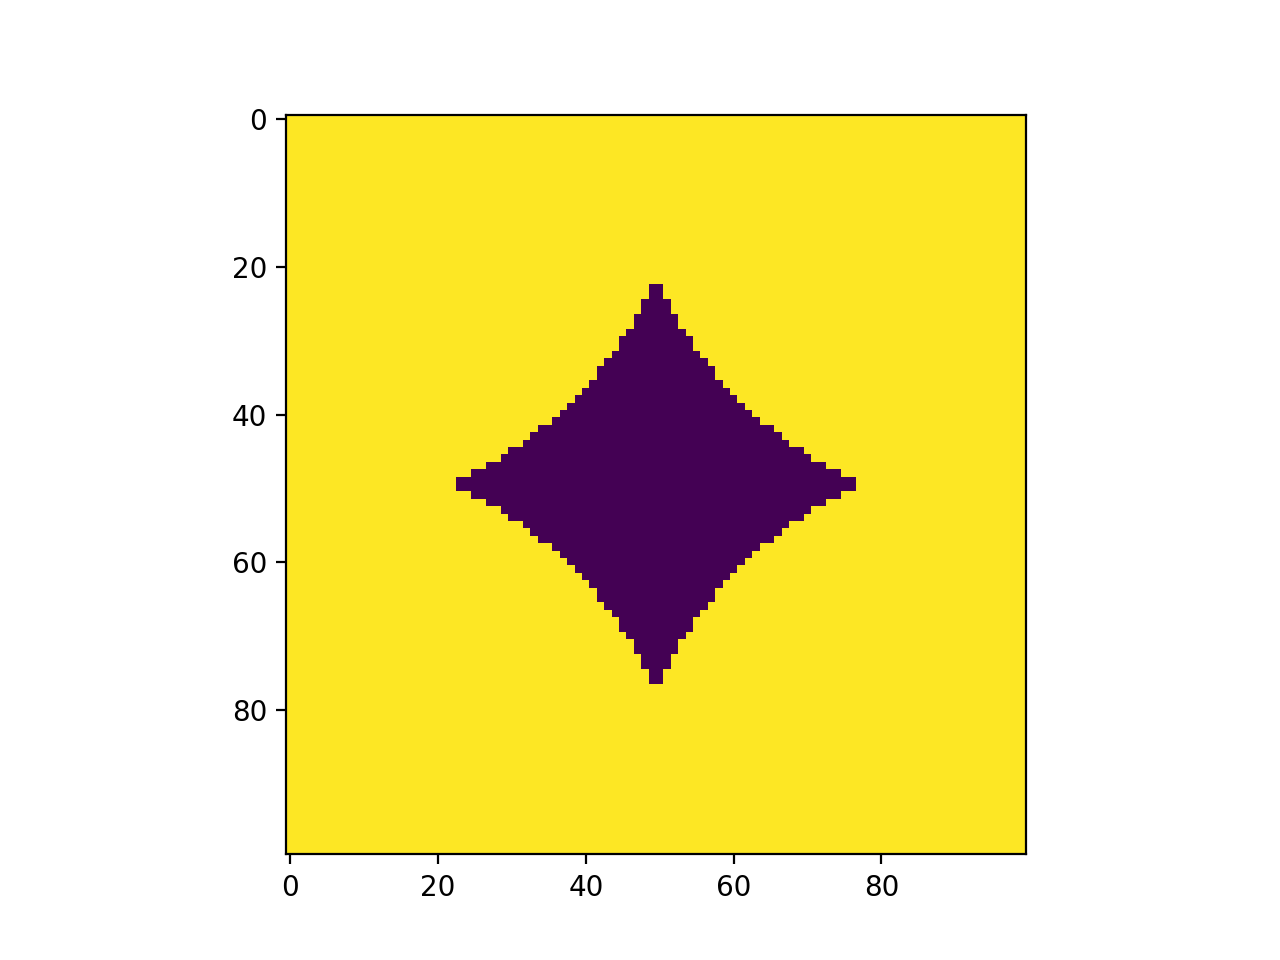

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(Z, interpolation='none')

-----------